In [1]:
# importing basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading the sentiment analysis and canadian elections data

main_df = pd.read_csv('sentiment_analysis.csv')
elections_df = pd.read_csv('Canadian_elections_2021.csv')
train_df = main_df.copy()
train_df.head()

,ID,text,label
0,7.68098E+17,Josh Jenkins is looking forward to TAB Breeder...,1.0
1,7.68098E+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1.0
2,7.68098E+17,"RT @PEPalerts: This September, @YESmag is taki...",1.0
3,7.68098E+17,"RT @david_gaibis: Newly painted walls, thanks ...",1.0
4,7.68098E+17,RT @CedricFeschotte: Excited to announce: as o...,1.0


In [3]:
# Cleaning tweets

from bs4 import BeautifulSoup
import html
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install -q wordcloud
import wordcloud
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import io
import unicodedata
import string

!pip install emoji
import emoji

stop_words = set(stopwords.words('english'))

# Function for cleaning tweets
def clean_tweets(line):
  print (f"for the line: {line}")
  # removing all the HTML Tags
  line = BeautifulSoup(line, "lxml").text
  #print("HTML tags removed")

  # Converting the html character codes to ASCII equivalent symbol
  line = html.unescape(line)
  #print("html character codes changed")

  # Removing all URL's
  line = re.sub(r'https?:\/\/\S+',"",line)
  line = re.sub(r'www.\S+',"",line)
  #print ("URL removed")

  # converting all the character in the text to lower 
  line = line.lower()
  #print("lowercase converted")

  # removing the retweet tag
  line = re.sub(r'\brt\b', '', line)

  # removing all the emoji's
  line = re.sub(emoji.get_emoji_regexp(),'',line)

  # for removing all the stop words and numbers
  line = (" ").join([word for word in word_tokenize(line) if word not in stop_words and word.isdigit()==False])
  #print("removed all stop words and numbers")

  print(f"After cleaning data: {line}")
  print ("________________________________________________________________________\n")
  return line




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
     |████████████████████████████████| 170 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=0e172ce8f44311f502e80aa6d5008eccbe31d96b2ffca69fcc4b6dea298dd6ad
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
# Cleaning the tweets
train_df['cleaned_text'] = train_df['text'].apply(lambda x:clean_tweets(x))

In [4]:
# picking the cleaned tweets and reading it
train_df.to_pickle("corpus.pkl") # picking the corpus
train_df_pickle = pd.read_pickle('corpus.pkl') # reading the pickled corpus

In [7]:
# printing the cleaned text
train_df_pickle.head(5)

,ID,text,label,cleaned_text
0,7.68098E+17,Josh Jenkins is looking forward to TAB Breeder...,1.0,josh jenkins looking forward tab breeders crow...
1,7.68098E+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1.0,@ mianusmanjaved : congratulations pakistan be...
2,7.68098E+17,"RT @PEPalerts: This September, @YESmag is taki...",1.0,"@ pepalerts : september , @ yesmag taking main..."
3,7.68098E+17,"RT @david_gaibis: Newly painted walls, thanks ...",1.0,"@ david_gaibis : newly painted walls , thanks ..."
4,7.68098E+17,RT @CedricFeschotte: Excited to announce: as o...,1.0,@ cedricfeschotte : excited announce : july fe...


In [8]:
# checking the elections dataset
elections_df.head(5)

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN


In [9]:
# cleaning the elections dataset tweets
elections_df['cleaned_text'] = elections_df['text'].apply(lambda x:clean_tweets(x))

for the line: The Canadian election is a power grab by PM Trudeau, yes -- to take it away from the opposition leaders who have chosen obstruction (20 non-confidence motions) and disinformation in the middle of a worldwide pandemic. Yes, no one wanted a vote; the opposition antics forced it.
After cleaning data: canadian election power grab pm trudeau , yes -- take away opposition leaders chosen obstruction ( non-confidence motions ) disinformation middle worldwide pandemic . yes , one wanted vote ; opposition antics forced .
________________________________________________________________________

for the line: I do hope Trudeau loses the Canadian election tomorrow , called a snap one thinking he’d romp it.. Seems the people there don’t like a Black face hypocrite, super wokist &amp; COVID restriction groupie..  Let’s hope the polls are right, might make our Government think again.
After cleaning data: hope trudeau loses canadian election tomorrow , called snap one thinking ’ romp it..

Since the Datacleaning as required has been completed, inorder to segreggate the elections data into respective parties, webscrapping of the party team members name is done from their official websites. 

**Part 2: EDA**

In [20]:
import requests

# Webscrapping of liberal party team members

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36'}
url = f"https://liberal.ca/your-liberal-mps/"
result = requests.get(url,headers)
soup = BeautifulSoup(result.content,'html.parser')
liberals_names_tag = soup.find_all('h2',class_='person__name')
liberalparty_names = []
for each in liberals_names_tag:
  name_liberals = each.text
  liberalparty_names.append(name_liberals.lower()) # using lower function to save everyname scapped in lowercase as our corpus is in lowercase
  liberalparty_names.append(name_liberals.replace(" ","").lower()) #connecting firstname and lastname of the same person without any spaces

In [21]:
# some extra names which are attributable to liberal party
extra_liberal_names = ["liberal", "liberals", "liberal_party","liberal party","justin","trudeau","canada pm","pm","canadian pm","prime minister"]
liberalparty_names.extend(extra_liberal_names)

In [22]:
# liberals names
print(f"Number of liberal party team members name scrapped from website: {len(liberalparty_names)}")

Number of liberal party team members name scrapped from website: 328


In [23]:
# Webscrapping of conservative party team members

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36'}
url = f"https://www.conservative.ca/mps/"
result = requests.get(url,headers)
soup = BeautifulSoup(result.content,'html.parser')
divtag = soup.find_all('div',class_="cabinet-flex-content")
eachname = []
for everytag in divtag:
  conservatives_names_tag = everytag.find_all('h3',style='padding: 0 1rem; margin:0 auto;')
  name = []
  for each in conservatives_names_tag:
    each_name = each.text
    name.append(each_name)
  candidate_name = " ".join(name)
  eachname.append(candidate_name.lower())
  eachname.append(candidate_name.replace(" ","").lower())


In [24]:
# Extra names from the corpus for conservative team members
extra_conservatives_names = ["conservative","conservatives","cpc_hq","conservative party","erin","o'toole","otoole"]
eachname.extend(extra_conservatives_names)

In [25]:
# list of liberals names
print(f"Number of conservative party team members name scrapped from website: {len(eachname)}")

Number of conservative party team members name scrapped from website: 245


In [26]:
# extracting NDP information by webscrapping

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36'}
url = f"https://www.ndp.ca/team"
result = requests.get(url,headers)
soup = BeautifulSoup(result.content,'html.parser')
ndp_names_tag = soup.find_all('div',class_='campaign-civics-list-title civic-name')
ndp_names = []
for each in ndp_names_tag:
  name_ndp = each.text
  ndp_names.append(name_ndp.lower())
  ndp_names.append(name_ndp.replace(" ","").lower())

In [27]:
# Extra name for NDP party members
extra_ndp_names = ["new democratic party", "ndp", "jagmeet"]
ndp_names.extend(extra_ndp_names)

In [28]:
# Common names seen throughout the tweets for PPC is given below
ppc_names = ["peoples party of canada", "ppc", "maxime bernier","maxime","bernier"]

In [29]:
# classifying tweets based on the name list for liberals
elections_df["party"] = elections_df['cleaned_text'].apply(lambda x: "liberal" if any(ele in x for ele in liberalparty_names) else "")

In [31]:
# classifying tweets based on the name list for conservatives
elections_df["party_conservative"] = elections_df['cleaned_text'].apply(lambda x: "conservative" if any(ele in x for ele in eachname) else "")

In [33]:
# classifying tweets based on the name list for NDP
elections_df["party_ndp"] = elections_df['cleaned_text'].apply(lambda x: "NDP" if any(ele in x for ele in ndp_names) else "")

In [35]:
# classifying tweets based on the name list for PPC
elections_df["party_ppc"] = elections_df['cleaned_text'].apply(lambda x: "PPC" if any(ele in x for ele in ppc_names) else "")

In [37]:
# Adding all the party names in a single column
elections_df["overall_party"] = elections_df['party'].astype(str) + elections_df['party_conservative'].astype(str) + elections_df['party_ndp'].astype(str)  + elections_df['party_ppc'].astype(str)

In [38]:
# Tweets classification
elections_df['overall_party'].value_counts()

liberal                      299
                             216
conservative                 179
liberalconservative          133
PPC                           42
liberalconservativePPC        24
NDP                           23
liberalPPC                    20
liberalconservativeNDP        20
conservativePPC               19
liberalNDP                    18
conservativeNDP                4
NDPPPC                         3
liberalNDPPPC                  1
liberalconservativeNDPPPC      1
Name: overall_party, dtype: int64

In [39]:
# Renaming all the multiple party tags to mixed and not classified as unknown
elections_df['overall_party_cleaned'] = elections_df['overall_party'].apply(lambda x: "Unknown" if x == "" else "liberal" if x =="liberal" else "conservative" if x=="conservative" 
                                                                            else "PPC" if x=="PPC" else "NDP" if x=="NDP" else "mixed" )


In [40]:
# Count of tweets based on party names 
elections_df['overall_party_cleaned'].value_counts()

liberal         299
mixed           243
Unknown         216
conservative    179
PPC              42
NDP              23
Name: overall_party_cleaned, dtype: int64

In [41]:
# Checking the list of tweets which are unknown to understand the validity of the classification
j = 1
for i in elections_df['cleaned_text'][elections_df['overall_party_cleaned']=='Unknown']:
  print (f"{j}) {i}\n")
  j = j+1

1) dear canadians , election test progressive . whether stand science , women ’ bipoc rights , equality , public healthcare & education , environment . whether stand hate . much lose . ’ let us fall back . # cdnpoli # elxn44

2) ’ sorry , moderators respond leadership candidates ’ ? debate farce frankly disservice canadians , awful formats hope next election see new moderation format . ’ two goes , ’ enough . # elxn44 # cdnpoli

3) say . 've skeptical critical mainstream canadian journalism , never seen level trying choose winner/influence outcome election one . feel objectivity lost art many # cdnmedia . # cdnpoli

4) every time close eyes , brain starts thinking ’ toole kenney apparently sort arrangement aid cpc ’ election prospects actually cost canadians lives . ’ devastating sense … well , everything .

5) # throwbackthursday federal election debate night , ready tie happens 's # election2021 debate night tonight - 'm ready jump anyone talks taxing cookies ! # vote # canada # cdnp

Observation:    
From the above list of tweets, it can be seen that most of the tweets are related to election in general, its not specifically related to a particular party. 

In [42]:
# Creating a copy of elections dataset
elections_df_copy = elections_df.copy()

In [43]:
# dropping all the unnecessary columns
elections_df_copy = elections_df_copy.drop('party',axis=1)
elections_df_copy = elections_df_copy.drop('party_conservative',axis=1)
elections_df_copy = elections_df_copy.drop('party_ndp',axis=1)
elections_df_copy = elections_df_copy.drop('party_ppc',axis=1)
elections_df_copy = elections_df_copy.drop('overall_party',axis=1)

In [45]:
# printing the elections dataset 
elections_df_copy.head()

,text,sentiment,negative_reason,cleaned_text,overall_party_cleaned
0,The Canadian election is a power grab by PM Tr...,negative,calling election early,"canadian election power grab pm trudeau , yes ...",liberal
1,I do hope Trudeau loses the Canadian election ...,negative,covid,hope trudeau loses canadian election tomorrow ...,liberal
2,"Dear Canadians, This election is a test of how...",positive,NaN,"dear canadians , election test progressive . w...",Unknown
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early,canadian friends : never forget trudeau years ...,liberal
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN,sorry @ thejagmeetsingh voted # ndp life elect...,mixed


In [46]:
# Elections dataset summary
summary_elections = pd.crosstab(elections_df_copy['overall_party_cleaned'],elections_df_copy['sentiment'] , dropna = None).reset_index()

In [47]:
# Each party's summary of positive and negative tweets
summary_elections['total'] = summary_elections['negative']+summary_elections['positive']
summary_elections['total_percentage'] = summary_elections['total'].div(summary_elections['total'].sum())
summary_elections['percentage_positive'] = summary_elections['positive'].div(summary_elections['total'])# percentage in fraction - positive tweets
summary_elections['percentage_negative'] = summary_elections['negative'].div(summary_elections['total'])# percentage in fraction - Negative tweets

In [48]:
summary_elections

sentiment,overall_party_cleaned,negative,positive,total,total_percentage,percentage_positive,percentage_negative
0,NDP,2,21,23,0.022954,0.913043,0.086957
1,PPC,9,33,42,0.041916,0.785714,0.214286
2,Unknown,58,158,216,0.215569,0.731481,0.268519
3,conservative,79,100,179,0.178643,0.558659,0.441341
4,liberal,156,143,299,0.298403,0.478261,0.521739
5,mixed,83,160,243,0.242515,0.658436,0.341564


In [59]:
# storing the labels of the party names and positive, negative tweets values in a list
labels_gender = []
sizes_gender = []
positive_values = []
negative_values = []
for i in  range(len(summary_elections['negative'])):
  labels_gender.append('positive')# storing labels of the party names 
  labels_gender.append('negative')
  sizes_gender.append(summary_elections.positive[i])# storing values of positive tweets for each parties
  positive_values.append(summary_elections.positive[i])
  sizes_gender.append(summary_elections.negative[i])# storing values of Negative tweets for each parties
  negative_values.append(summary_elections.negative[i])


In [212]:
# Distribution of election party tweets (positive and negative tweets)
import plotly.graph_objects as go
labels = list(summary_elections.overall_party_cleaned)
#colors = ["orangered","purple","gray","blue","red","gray"]
#neg_colors = ["orange","salmon","lightslategray","lightblue","lightcyan","lightslategray"]
fig = go.Figure(data=[
    go.Bar(name='Positive_tweets', x=labels, y=positive_values,text=positive_values),
    go.Bar(name='Negative_tweets', x=labels, y=negative_values,text=negative_values)
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(    
    autosize=False,
    width=800,
    height=500,
    title_text="Election tweets distribution between parties ",
    xaxis_title="Election parties in Canada",
    yaxis_title="Counts of tweets")
fig.show()

In [66]:
# Lemmatizing the corpus to extract the best features for the word cloud
from nltk.stem import WordNetLemmatizer
# Function to lematize the corpus
def preprocess(line):
  corpus = []
  lem = WordNetLemmatizer()
  line = (" ").join([lem.lemmatize(w) for w in word_tokenize(line)])
  return line

In [67]:
# lemmatizing the cleaned text
elections_df_copy['cleaned_text'] = elections_df_copy['cleaned_text'].apply(lambda x:preprocess(x))

In [68]:
# printing to check
elections_df_copy.head()

,text,sentiment,negative_reason,cleaned_text,overall_party_cleaned
0,The Canadian election is a power grab by PM Tr...,negative,calling election early,"canadian election power grab pm trudeau , yes ...",liberal
1,I do hope Trudeau loses the Canadian election ...,negative,covid,hope trudeau loses canadian election tomorrow ...,liberal
2,"Dear Canadians, This election is a test of how...",positive,NaN,"dear canadian , election test progressive . wh...",Unknown
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early,canadian friend : never forget trudeau year ma...,liberal
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN,sorry @ thejagmeetsingh voted # ndp life elect...,mixed


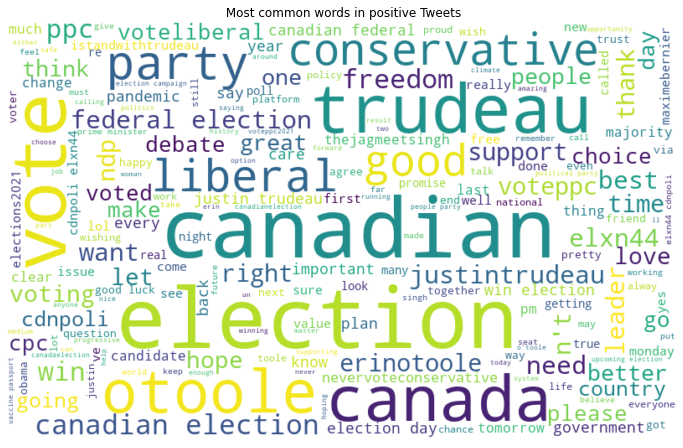

In [69]:
# Word cloud for the positive tweets overall from the elections dataset

from wordcloud import WordCloud
positive_df = elections_df_copy[elections_df_copy['sentiment'] == 'positive']
words = " ".join([words for words in positive_df['cleaned_text']])
wordcloud = WordCloud(width=800, height=500, background_color ='white', random_state=0, max_font_size=100).generate(words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(" Most common words in positive Tweets")
plt.show()

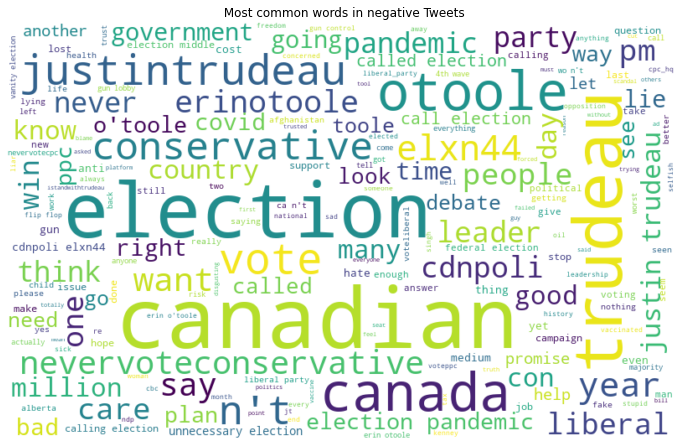

In [70]:
# Word cloud for the negative elections tweets overall
negative_df = elections_df_copy[elections_df_copy['sentiment'] == 'negative']
words = " ".join([words for words in negative_df['cleaned_text']])
wordcloud = WordCloud(width=800, height=500, background_color ='white', random_state=0, max_font_size=100).generate(words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(" Most common words in negative Tweets")
plt.show()

In [71]:
# creating a corpus to visualize for each party
def word_corpus (df): # Function to provide a corpus based on dataframe sent
  corpus_lines = []
  corpus = []
  corpus_connected = []
  corpus_connected = (" ").join(list(df['cleaned_text']))
  lem = WordNetLemmatizer()
  for w in word_tokenize(corpus_connected):
    line = lem.lemmatize(w) 
    corpus_lines.append(line)
  corpus = (" ").join(corpus_lines) 
  return corpus, corpus_lines

In [72]:
# removing all the punctuations to visualize the party's tweets separately
word_corpus_overall = word_corpus(elections_df_copy)
stopwords_visualisation = nltk.corpus.stopwords.words('english')
stop_extra = ["#","@",",","!","’","?","'s","n't","."]
stopwords_visualisation.extend(stop_extra)

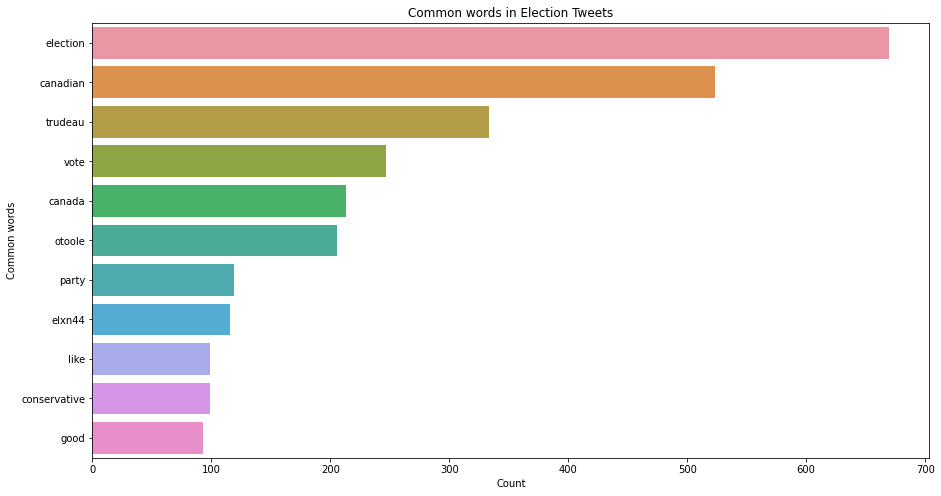

In [73]:
# function to see the most common words for each party separately
from collections import  Counter
def most_common_words (corpus, party):
  counter = Counter(corpus[1])
  most=counter.most_common()

  x, y= [], []
  for word,count in most[1:20]:
    if (word not in stopwords_visualisation):
      x.append(word)
      y.append(count)

  plt.figure(figsize = (15,8))
  p = sns.barplot(x=y,y=x)
  p.set_xlabel("Count", fontsize = 10)
  p.set_ylabel("Common words", fontsize = 10)
  p.set_title(f"Common words in {party}")
  plt.show()

most_common_words(word_corpus_overall, 'Election Tweets')

Observation:    
From the common election dataset it can be seen that its mostly related to main party leaders names and the tags for the election and party names.

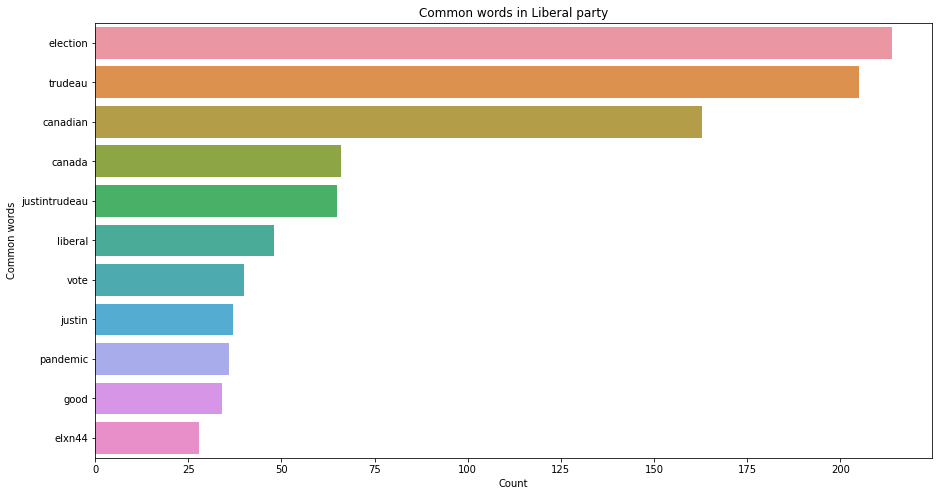

In [74]:
# creating a dataframe to visualize for liberal party 
liberaldf = elections_df_copy[elections_df_copy['overall_party_cleaned'] == 'liberal'].reset_index()
# ploting the word count graph
corpus_lines_lib = word_corpus(liberaldf)
most_common_words(corpus_lines_lib,'Liberal party')

Obervation:

From the plot it can be seen that the Liberal party is mainly concentrating about the covid situation from the count plot of words

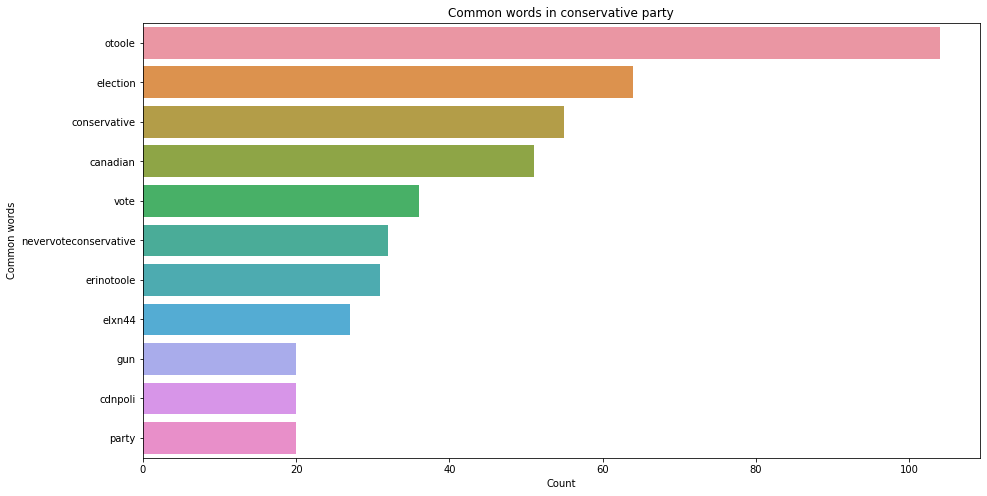

In [75]:
# Similarly for Conservative party
conservativedf = elections_df_copy[elections_df_copy['overall_party_cleaned'] == 'conservative'].reset_index()
corpus_lines_consevative = word_corpus(conservativedf)
most_common_words(corpus_lines_consevative,'conservative party')

Observation 

Conservative party were mainly focussing on the gun permission and control in their twitter campaign.


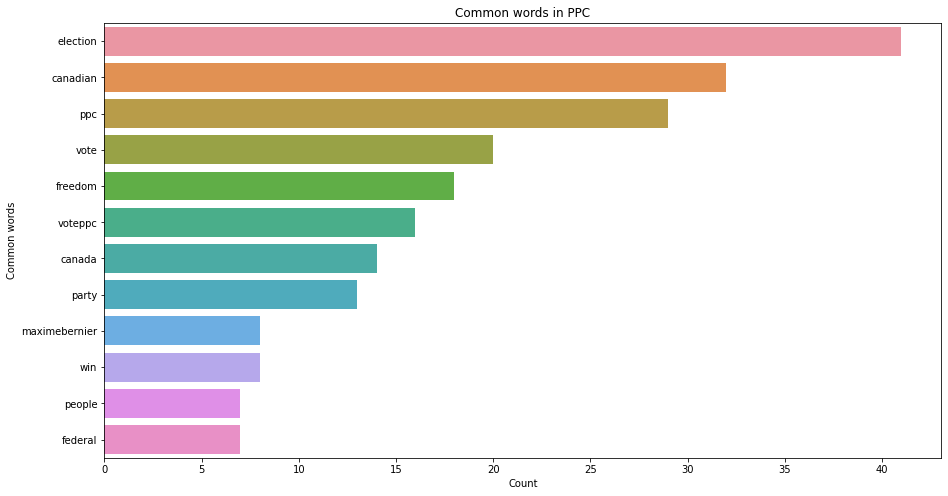

In [76]:
# Common words for PPC party
ppcdf = elections_df_copy[elections_df_copy['overall_party_cleaned'] == 'PPC'].reset_index()
corpus_lines_ppc = word_corpus(ppcdf)
most_common_words(corpus_lines_ppc,'PPC')

Obervation:

from the plot it can be seen that People party is mainly talking about the freedom and their chances of winning the election

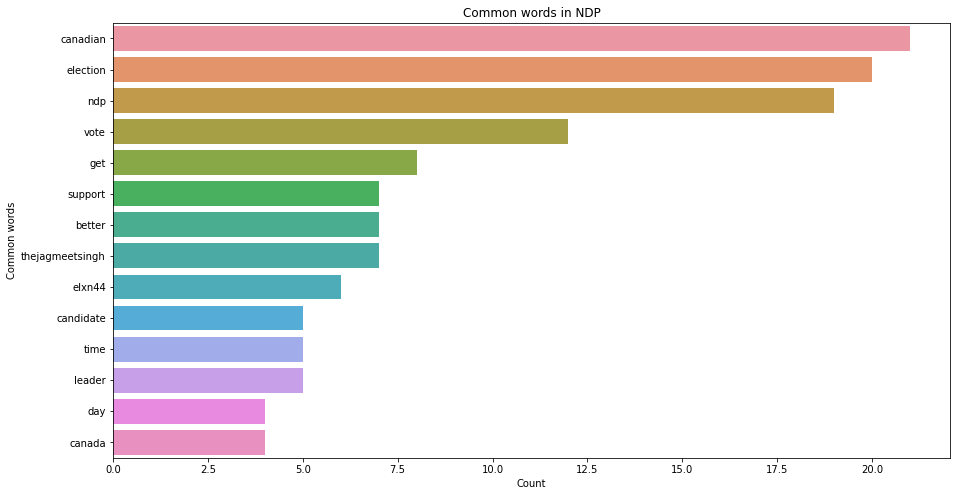

In [77]:
# Common words plot for NDP party
ndpdf = elections_df_copy[elections_df_copy['overall_party_cleaned'] == 'NDP'].reset_index()
corpus_lines_ndp = word_corpus(ndpdf)
most_common_words(corpus_lines_ndp,'NDP')

Obervation:    
from the plot it can be seen that NDP twitter campaign is mainly focused on support to families and about things getting better and a time for change.

In [188]:
list(train_df_pickle['label'].value_counts())

1.0    371334
0.0    179046
Name: label, dtype: int64

In [211]:
color = ["blue","red"]
fig = go.Figure([go.Bar(x=["Positive","Negative"], y=list(train_df_pickle['label'].value_counts()),marker_color=color,text=list(train_df_pickle['label'].value_counts()))])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(    
    autosize=False,
    width=800,
    height=500,
    title_text="Tweet Distribution in sentiment analysis dataset",
    xaxis_title="Classes",
    yaxis_title="Counts of tweets")
fig.show()

In [78]:
# lemmatizing the sentiment analysis text data 
train_df_pickle['cleaned_text'] = train_df_pickle['cleaned_text'].apply(lambda x:preprocess(x))

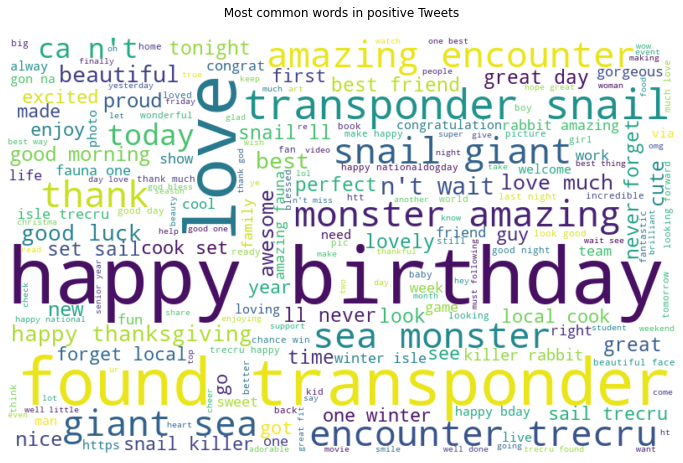

In [79]:
# Word cloud of positive sentiment from sentiment analysis dataset
positive_df = train_df_pickle[train_df_pickle['label'] == 1.0]
words = " ".join([words for words in positive_df['cleaned_text']])
wordcloud = WordCloud(width=800, height=500, background_color ='white', random_state=0, max_font_size=100).generate(words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(" Most common words in positive Tweets \n")
plt.show()

Obervation:     

It can be seen that the most of the words in positive tweets are wishes and statement about love.

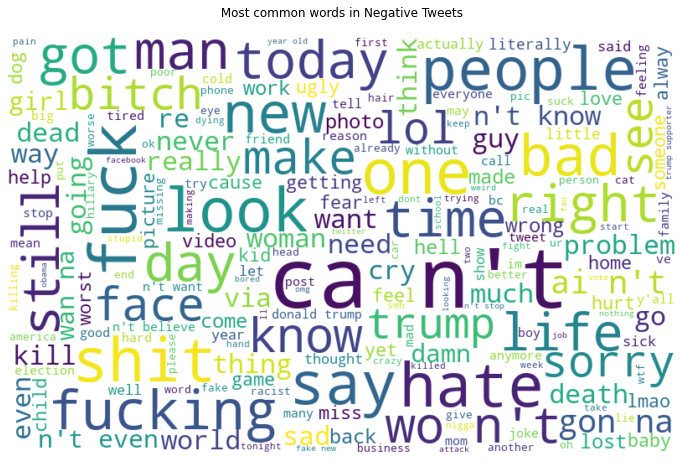

In [191]:
# word cloud for the negative sentiment tweets in sentiment analysis dataset
negative_df = train_df_pickle[train_df_pickle['label'] == 0.0]
words = " ".join([words for words in negative_df['cleaned_text']])
wordcloud = WordCloud(width=800, height=500, background_color ='white', random_state=0, max_font_size=100).generate(words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(" Most common words in Negative Tweets \n")
plt.show()

Observation:    
 from the plot it can be seen that many negative tweets are related to profanity and negative emotions words like cant, wont, bad, etc., 

**Part 3: Model preparation:**

In [81]:
# Separating xvalue and y value
X_value = train_df_pickle['cleaned_text']
y_value = train_df_pickle['label']

In [82]:
# converting the array to dataframe
X_value_df = pd.DataFrame(data = X_value,columns = ['cleaned_text'])
y_value_df = pd.DataFrame(y_value)

# dropping the values which are not classified
X_value.drop(index = X_value[(y_value.isnull()) ].index,inplace =True)
y_value.drop(index = y_value[(y_value.isnull()) ].index,inplace =True)

In [83]:
# splitting the dataset to 30% testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_value, y_value, test_size=0.3, random_state=1)

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#TFIDF and BOW methods for word feature extraction
tfidf = TfidfVectorizer()
count_vect = CountVectorizer() 


In [85]:
# converting text to tfidf 
x_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# converting text to bow
x_train_bow = count_vect.fit_transform(X_train)
X_test_bow = count_vect.transform(X_test)


In [ ]:
# Logistic regression for bow and tfidf
training_score = []
testing_score = []

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model1 = LogisticRegression()
model1.fit(x_train_bow,y_train)
y_hat_bow = model1.predict(X_test_bow)
y_hat_bow_lr_tr = model1.predict(x_train_bow)

training_score.append(accuracy_score(y_train,y_hat_bow_lr_tr))
testing_score.append(accuracy_score(y_test,y_hat_bow))
print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_bow_lr_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_bow))

Accuracy value of training set:  0.9858098041353247
Accuracy value of testing set:  0.9737332994173722


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat_bow)) 

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     53658
         1.0       0.98      0.98      0.98    111456

    accuracy                           0.97    165114
   macro avg       0.97      0.97      0.97    165114
weighted avg       0.97      0.97      0.97    165114



In [ ]:
model2 = LogisticRegression()
model2.fit(x_train_tfidf,y_train)
y_hat_tfidf = model2.predict(X_test_tfidf)
y_hat_tfidf_lr_tr = model2.predict(x_train_tfidf)

training_score.append(accuracy_score(y_train,y_hat_tfidf_lr_tr))
testing_score.append(accuracy_score(y_test,y_hat_tfidf))
print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_tfidf_lr_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_tfidf))

Accuracy value of training set:  0.9785602674515789
Accuracy value of testing set:  0.9713834078273194


In [ ]:
print(classification_report(y_test, y_hat_tfidf))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96     53658
         1.0       0.98      0.98      0.98    111456

    accuracy                           0.97    165114
   macro avg       0.97      0.97      0.97    165114
weighted avg       0.97      0.97      0.97    165114



In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(x_train_bow,y_train)
y_hat_bow_nb = model3.predict(X_test_bow)
y_hat_bow_nb_tr = model3.predict(x_train_bow)

training_score.append(accuracy_score(y_train,y_hat_bow_nb_tr))
testing_score.append(accuracy_score(y_test,y_hat_bow_nb))
print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_bow_nb_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_bow_nb))

Accuracy value of training set:  0.9612138107177898
Accuracy value of testing set:  0.9477451942294415


In [ ]:
print(classification_report(y_test, y_hat_bow_nb))

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     53658
         1.0       0.95      0.97      0.96    111456

    accuracy                           0.95    165114
   macro avg       0.94      0.94      0.94    165114
weighted avg       0.95      0.95      0.95    165114



In [ ]:
model4 = MultinomialNB()
model4.fit(x_train_tfidf,y_train)
y_hat_tfidf_nb = model4.predict(X_test_tfidf)
y_hat_tfidf_nb_tr = model4.predict(x_train_tfidf)

training_score.append(accuracy_score(y_train,y_hat_tfidf_nb_tr))
testing_score.append(accuracy_score(y_test,y_hat_tfidf_nb))
print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_tfidf_nb_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_tfidf_nb))

Accuracy value of training set:  0.9365062061017583
Accuracy value of testing set:  0.9147074142713519


In [ ]:
print(classification_report(y_test, y_hat_tfidf_nb))

              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85     53658
         1.0       0.90      0.99      0.94    111456

    accuracy                           0.91    165114
   macro avg       0.93      0.88      0.90    165114
weighted avg       0.92      0.91      0.91    165114



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model5 = KNeighborsClassifier()
model5.fit(x_train_bow,y_train)
y_hat_bow_knn = model5.predict(X_test_bow)
y_hat_bow_knn_tr = model5.predict(x_train_bow)

training_score.append(accuracy_score(y_train,y_hat_bow_knn_tr))
testing_score.append(accuracy_score(y_test,y_hat_bow_knn))
print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_bow_knn_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_bow_knn))

Accuracy value of training set:  0.9241069806315636
Accuracy value of testing set:  0.8986821226546508


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat_bow_knn))

              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86     53658
         1.0       0.97      0.87      0.92    111456

    accuracy                           0.90    165114
   macro avg       0.88      0.91      0.89    165114
weighted avg       0.91      0.90      0.90    165114



In [ ]:
model6 = KNeighborsClassifier()
model6.fit(x_train_tfidf,y_train)
y_hat_tfidf_knn = model6.predict(X_test_tfidf)
y_hat_tfidf_knn = model6.predict(X_test_tfidf)
y_hat_tfidf_knn_tr = model6.predict(x_train_tfidf)

training_score.append(accuracy_score(y_train,y_hat_tfidf_knn_tr))
testing_score.append(accuracy_score(y_test,y_hat_tfidf_knn))
print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_tfidf_knn_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_tfidf_knn))

Accuracy value of training set:  0.5767080406783884
Accuracy value of testing set:  0.5956066717540608


In [ ]:
print(classification_report(y_test, y_hat_tfidf_knn))

              precision    recall  f1-score   support

         0.0       0.44      0.97      0.61     53658
         1.0       0.96      0.42      0.58    111456

    accuracy                           0.60    165114
   macro avg       0.70      0.69      0.60    165114
weighted avg       0.79      0.60      0.59    165114



In [ ]:
from sklearn.svm import LinearSVC
model7 = LinearSVC()
model7.fit(x_train_bow,y_train)
y_hat_bow_svm = model7.predict(X_test_bow)
y_hat_bow_svm_tr = model7.predict(x_train_bow)

training_score.append(accuracy_score(y_train,y_hat_bow_svm_tr))
testing_score.append(accuracy_score(y_test,y_hat_bow_svm))
print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_bow_svm_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_bow_svm))

Accuracy value of training set:  0.9948580980413533
Accuracy value of testing set:  0.9709291762055308


In [ ]:
print(classification_report(y_test, y_hat_bow_svm))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     53658
         1.0       0.98      0.97      0.98    111456

    accuracy                           0.97    165114
   macro avg       0.97      0.97      0.97    165114
weighted avg       0.97      0.97      0.97    165114



In [ ]:
model8 = LinearSVC()
model8.fit(x_train_tfidf,y_train)
y_hat_tfidf_svm = model8.predict(X_test_tfidf)
y_hat_tfidf_svm_tr = model8.predict(x_train_tfidf)

training_score.append(accuracy_score(y_train,y_hat_tfidf_svm_tr))
testing_score.append(accuracy_score(y_test,y_hat_tfidf_svm))

print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_tfidf_svm_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_tfidf_svm))

Accuracy value of training set:  0.9915798435366734
Accuracy value of testing set:  0.9732608985307121


In [ ]:
print(classification_report(y_test, y_hat_tfidf_svm))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     53658
         1.0       0.98      0.98      0.98    111456

    accuracy                           0.97    165114
   macro avg       0.97      0.97      0.97    165114
weighted avg       0.97      0.97      0.97    165114



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model9 = DecisionTreeClassifier()
model9.fit(x_train_bow,y_train)
y_hat_bow_dt = model9.predict(X_test_bow)
y_hat_bow_dt_tr = model9.predict(x_train_bow)

training_score.append(accuracy_score(y_train,y_hat_bow_dt_tr))
testing_score.append(accuracy_score(y_test,y_hat_bow_dt))

print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_bow_dt_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_bow_dt))

Accuracy value of training set:  0.9998468590532256
Accuracy value of testing set:  0.9491078890948073


In [ ]:
print(classification_report(y_test, y_hat_bow_dt))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92     53658
         1.0       0.96      0.96      0.96    111456

    accuracy                           0.95    165114
   macro avg       0.94      0.94      0.94    165114
weighted avg       0.95      0.95      0.95    165114



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model10 = DecisionTreeClassifier()
model10.fit(x_train_tfidf,y_train)
y_hat_tfidf_dt = model10.predict(X_test_tfidf)
y_hat_tfidf_dt_tr = model10.predict(x_train_tfidf)

training_score.append(accuracy_score(y_train,y_hat_tfidf_dt_tr))
testing_score.append(accuracy_score(y_test,y_hat_tfidf_dt))

print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_tfidf_dt_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_tfidf_dt))

Accuracy value of training set:  0.9998468590532256
Accuracy value of testing set:  0.9466186998074058


In [ ]:
print(classification_report(y_test, y_hat_tfidf_dt))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92     53658
         1.0       0.96      0.96      0.96    111456

    accuracy                           0.95    165114
   macro avg       0.94      0.94      0.94    165114
weighted avg       0.95      0.95      0.95    165114



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model11 = RandomForestClassifier()
model11.fit(x_train_bow,y_train)
y_hat_bow_rf = model11.predict(X_test_bow)
y_hat_bow_rf_tr = model11.predict(x_train_bow)

training_score.append(accuracy_score(y_train,y_hat_bow_rf_tr))
testing_score.append(accuracy_score(y_test,y_hat_bow_rf))

print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_bow_rf_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_bow_rf))

Accuracy value of training set:  0.9998468590532256
Accuracy value of testing set:  0.9624744116186392


In [ ]:
print(classification_report(y_test, y_hat_bow_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     53658
         1.0       0.98      0.97      0.97    111456

    accuracy                           0.96    165114
   macro avg       0.95      0.96      0.96    165114
weighted avg       0.96      0.96      0.96    165114



In [ ]:
model12 = RandomForestClassifier()
model12.fit(x_train_tfidf,y_train)
y_hat_tfidf_rf = model12.predict(X_test_tfidf)
y_hat_tfidf_rf_tr = model12.predict(x_train_tfidf)

training_score.append(accuracy_score(y_train,y_hat_tfidf_rf_tr))
testing_score.append(accuracy_score(y_test,y_hat_tfidf_rf))

print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_tfidf_rf_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_tfidf_rf))

Accuracy value of training set:  0.9998442634439582
Accuracy value of testing set:  0.962880191867437


In [ ]:
print(classification_report(y_test, y_hat_tfidf_rf))

In [ ]:
#pip install xgboost
from xgboost import XGBClassifier
model13 = XGBClassifier()
model13.fit(x_train_bow,y_train)
y_hat_bow_xgb = model13.predict(X_test_bow)
y_hat_bow_xgb_tr = model13.predict(x_train_bow)

training_score.append(accuracy_score(y_train,y_hat_bow_xgb_tr))
testing_score.append(accuracy_score(y_test,y_hat_bow_xgb))

print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_bow_xgb_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_bow_xgb))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat_bow_xgb))

              precision    recall  f1-score   support

         0.0       0.70      0.97      0.81     53658
         1.0       0.98      0.80      0.88    111456

    accuracy                           0.86    165114
   macro avg       0.84      0.89      0.85    165114
weighted avg       0.89      0.86      0.86    165114



In [ ]:
model14 = XGBClassifier()
model14.fit(x_train_tfidf,y_train)
y_hat_tfidf_xgb = model14.predict(X_test_tfidf)
y_hat_tfidf_xgb_tr = model14.predict(x_train_tfidf)

training_score.append(accuracy_score(y_train,y_hat_tfidf_xgb_tr))
testing_score.append(accuracy_score(y_test,y_hat_tfidf_xgb))

print ("Accuracy value of training set: ",accuracy_score(y_train,y_hat_tfidf_xgb_tr))
print ("Accuracy value of testing set: ",accuracy_score(y_test,y_hat_tfidf_xgb))

Accuracy value of training set:  0.8563979172831239
Accuracy value of testing set:  0.8565657666824134


In [ ]:
print(classification_report(y_test, y_hat_tfidf_xgb))

              precision    recall  f1-score   support

         0.0       0.70      0.97      0.81     53658
         1.0       0.98      0.80      0.88    111456

    accuracy                           0.86    165114
   macro avg       0.84      0.89      0.85    165114
weighted avg       0.89      0.86      0.86    165114



In [97]:
# list of models and word vectors used
models_used = ["Logistic_Regression","Logistic_Regression","Naive_bayes","Naive_bayes","KNN","KNN","Linear_SVC","Linear_SVC","Decision_tree","Decision_tree",
               "Random_forest","Random_forest","XG_boost","XG_boost"]
word_vector = ["BOW","TFIDF","BOW","TFIDF","BOW","TFIDF","BOW","TFIDF","BOW","TFIDF","BOW","TFIDF","BOW","TFIDF"]
dict_models = {"Models":models_used,"Method":word_vector,"Training_values":training_score,"Testing_values":testing_score}
model_results = pd.DataFrame(dict_models)
model_results

,Models,Method,Training_values,Testing_values
0,Logistic_Regression,BOW,0.985810,0.973733
1,Logistic_Regression,TFIDF,0.978560,0.971383
2,Naive_bayes,BOW,0.961214,0.947745
3,Naive_bayes,TFIDF,0.936506,0.914707
4,KNN,BOW,0.924107,0.898682
5,KNN,TFIDF,0.576708,0.595607
6,Linear_SVC,BOW,0.994858,0.970929
7,Linear_SVC,TFIDF,0.991580,0.973261
8,Decision_tree,BOW,0.999847,0.949108
9,Decision_tree,TFIDF,0.999847,0.946619


Obervation:    

It can be seen that accuracy score of logistic regression, Naive bayes and SVM performed well, whereas tree based techniques tends to overfit the data. since our other models provided satisfactory result, we are taking the same for further model preparation and analysis. 

In common bag of words model performed well compared to tfidf. 

**Part4: Model implementation and Evaluating the best performance model on the canadian elections data**

In [99]:
# encoding the sentiment to 0's and 1's
elections_df_copy['sentiment_encoded'] = elections_df_copy['sentiment'].apply(lambda x: 0 if x=='negative' else 1 )
y_true_value = elections_df_copy ['sentiment_encoded']
elections_text = elections_df_copy['cleaned_text']
# Converting the elections data text to bow and tdidf vectors 
elections_bow = count_vect.transform(elections_text)
elections_tfifd = tfidf.transform(elections_text)

In [ ]:
# Hyper parameter tunining - BOW - Logistic regression 

from sklearn.model_selection import GridSearchCV
grid={"C": np.logspace(-3,3,7), "penalty":["l1","l2"]}
model = LogisticRegression()
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_train_bow,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("Best hyperparameter for BOW_Logistic regression are: ) ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for BOW_Logistic regression are: )  {'C': 1.0, 'penalty': 'l2'}
accuracy score : 0.9720842235077537


In [ ]:
# Hyper parameter tunining - TFIDF - Logistic regression 

grid={"C": np.logspace(-3,3,7), "penalty":["l1","l2"]}
model = LogisticRegression()
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_train_tfidf,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("Best hyperparameter for TFIDF_Logistic regression are: ) ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for TFIDF_Logistic regression are: )  {'C': 10.0, 'penalty': 'l2'}
accuracy score : 0.9719803990359994


In [ ]:
# Hyper parameter tunining - BOW - Naive Bayes

grid={'alpha':np.linspace(0.01,1,100)}
model = MultinomialNB()
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_train_bow,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])})

In [ ]:
print("Best hyperparameter for BOW_Naive Bayes are: ) ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for BOW_Naive Bayes are: )  {'alpha': 1.0}
accuracy score : 0.943675277852442


In [ ]:
# Hyper parameter tunining - TFIDF - Naive Bayes

grid={'alpha':np.linspace(0.01,1,100)}
model = MultinomialNB()
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_train_tfidf,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])})

In [ ]:
print("Best hyperparameter for TFIDF_Naive Bayes are: ) ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for TFIDF_Naive Bayes are: )  {'alpha': 0.37}
accuracy score : 0.9227235200006747


In [ ]:
# Hyper parameter tunining - BOW - SVC

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
model = LinearSVC(random_state=0)
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_train_bow,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(random_state=0),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("Best hyperparameter for BOW_SVC are: ) ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for BOW_Naive Bayes are: )  {'C': 0.1, 'penalty': 'l2'}
accuracy score : 0.9720349076121231


In [ ]:
# Hyper parameter tunining - TFIDF - SVC

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
model = LinearSVC(random_state=0)
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_train_tfidf,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(random_state=0),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("Best hyperparameter for TFIDF_SVC are: ) ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for TFIDF_SVC are: )  {'C': 1.0, 'penalty': 'l2'}
accuracy score : 0.9713834094434605


Observation: From the Hyper-parameter tuned models, it can be seen that bag of words - Logistic regression model provided the best result. But the tfidf and bag of words model both provided the similar result.

In [100]:
# Predicting the elections dataset - with bag of words - Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(C=1.0,penalty='l2')
model.fit(x_train_bow,y_train)
y_pred = model.predict(elections_bow)

In [101]:
print (f"Accuracy value on elections dataset: {round (accuracy_score(y_true_value,y_pred),4)*100} %")

Accuracy value on elections dataset: 71.36 %


4.a.b) Other two metrics that we can use are,
1.  F1 score - since the data is not balanced, using accuracy score may lead to wrong representation of the model. F1 score using harmonic mean can provide the best representation of the model.
2. Confusion matrix - It can provide a intuitive way to understand the correct and wrond prediciton done by the model and whether the model is guessing or predicting values exactly.

Formula:     

F1_score = 2 * (precision * recall) / (precision + recall)


In [102]:
from sklearn.metrics import f1_score
# Calculating F1 score for the elections dataset
print (f"F1 score on elections dataset: {round(f1_score(y_true_value,y_pred),4)} ")

F1 score on elections dataset: 0.7222 


Confusion matrix - Election dataset


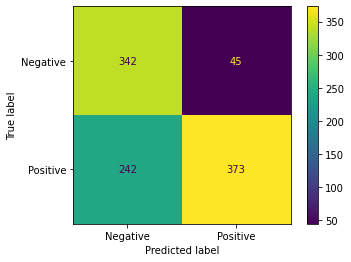

In [103]:
# Checking the Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
classes = ['Negative','Positive']
cm = confusion_matrix(y_true_value, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
print ("Confusion matrix - Election dataset")
disp.plot()
plt.show()

Observation: From the Above result it can be seen that F1 score is also similar to Accuracy value, which tells that model predicion can be increased based on further preprocessing of the data and make the training dataset more cleaner.

In [104]:
# Visualising the sentiment prediciton result and true sentiment value
elections_df_copy["predicted"] = y_pred
elections_df_copy['prediction'] = elections_df_copy['predicted'].apply(lambda x: 'negative' if x==0 else 'positive' ) # Encoding positive and negative

In [106]:
# Preparing a summary dataframe to visualuse prediction and actual party wise
pred_df = pd.crosstab( elections_df_copy['overall_party_cleaned'],elections_df_copy['prediction']).reset_index()
pred_df = pred_df.rename(columns={"negative": "Prediction_negative", "positive": "Prediction_positive"})
act_df = pd.crosstab( elections_df_copy['overall_party_cleaned'],elections_df_copy['sentiment']).reset_index()
act_df = act_df.rename(columns={"negative": "Actual_negative", "positive": "Actual_positive"})
summary_ = pd.concat([pred_df, act_df[['Actual_negative','Actual_positive']]],axis=1)
summary_ = summary_.drop(index=2,axis=0)
summary_ = summary_.drop(index=5,axis=0)
summary_

,overall_party_cleaned,Prediction_negative,Prediction_positive,Actual_negative,Actual_positive
0,NDP,6,17,2,21
1,PPC,15,27,9,33
3,conservative,105,74,79,100
4,liberal,199,100,156,143


In [213]:
# Plotting actual and prediciton of positive tweets party wise
fig = go.Figure(data=[
    go.Bar(name='Actual Positive', x=summary_['overall_party_cleaned'], y=summary_['Actual_positive'],text=summary_['Actual_positive']),
    go.Bar(name='Predicted Positive', x=summary_['overall_party_cleaned'], y=summary_['Prediction_positive'],text=summary_['Prediction_positive'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(    
    autosize=False,
    width=800,
    height=500,
    title_text="Positive tweets distribution for parties",
    xaxis_title="Election parties",
    yaxis_title="Counts of tweets")
fig.show()


In [214]:
# Plotting actual and prediciton of Negative tweets party wise
fig = go.Figure(data=[
    go.Bar(name='Actual Negative', x=summary_['overall_party_cleaned'], y=summary_['Actual_negative'],text=summary_['Actual_negative']),
    go.Bar(name='Predicted Negative', x=summary_['overall_party_cleaned'], y=summary_['Prediction_negative'],text=summary_['Prediction_negative'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(    
    autosize=False,
    width=800,
    height=500,
    title_text="Negative tweets distribution for parties",
    xaxis_title="Election parties",
    yaxis_title="Counts of tweets")
fig.show()

In [215]:
# Overall summary of positive and negative tweets (Actual values)
fig = go.Figure(data=[
    go.Bar(name='Actual Positive', x=summary_['overall_party_cleaned'], y=summary_['Actual_positive'],text=summary_['Actual_positive']),
    go.Bar(name='Actual Negative', x=summary_['overall_party_cleaned'], y=summary_['Actual_negative'],text=summary_['Actual_negative'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(    
    autosize=False,
    width=800,
    height=500,
    title_text="Actual Positive & Negative Tweets comparision for all parties",
    xaxis_title="Election parties",
    yaxis_title="Counts of tweets")
fig.show()

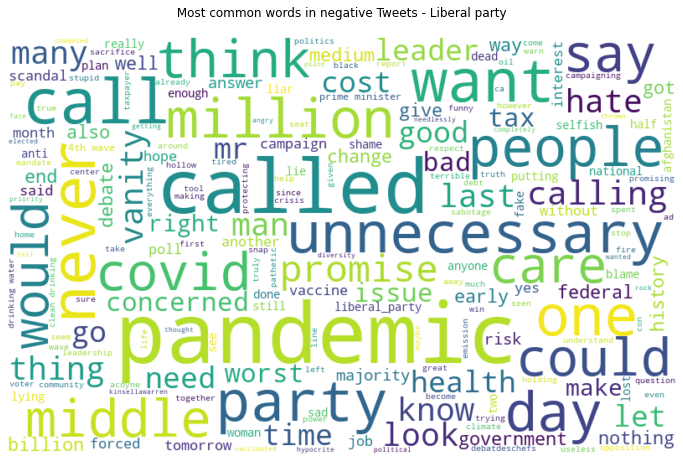

In [ ]:
# Negative words - word cloud for liberal party
negative_df = elections_df_copy[elections_df_copy['sentiment_encoded'] == 0]
negative_df = negative_df[negative_df['overall_party_cleaned']=='liberal']
words = " ".join([words for words in negative_df['cleaned_text']])
stop_words = ["elections", "election", "canada","canadian","trudeau","justintrudeau","justin","justin trudeau","elxn44","cdnpoli","liberal","pm","vote",
              "country","like","year","n't","get","going"]

wordcloud = WordCloud(width=800, height=500, background_color ='white', random_state=0, max_font_size=100,stopwords=stop_words).generate(words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(" Most common words in negative Tweets - Liberal party \n")
plt.show()

In [110]:
# Tweets distribution
tweetdist = y_value.value_counts()/y_value.count()
print (f"We have {round(tweetdist[1]*100,2)} % of negative tweets and {round(tweetdist[0]*100,2)} % of positive tweets")

We have 67.47 % of negative tweets and 32.53 % of positive tweets


Observation:    

From the above graphs it can be understood that model is predicting more negative than the positive tweets, that is primarily because the negative tweet distribution is more compared to positive tweets. However, its not overwhelmingly large gap between positive and negative tweets. Therefore our model was able to predict with 0.72 F1 score.

From the 3rd bar chart it can be seen that Liberal party have more negative tweets compared to other parties. From the word cloud we can see that mostly the negative tweets are due to pandemic related and we can see some cases related to tax.

The rest of the parties are generally viewed positively in twitter based on the dataset. 

NLP Analytics on tweets are definitely useful for political parties, because this can provide them an insight to how influencers, politicians, general public preceives their party. Then can always go to the drawing board to change their stategies accordingly.

Accuracy of model can be imporoved by using bigram, trigram (n-gram) and better distribution of positive and negative tweets and further better preprocessing of the trianing data (removing punctuations, adding better stop words)




4.b) Analysing Negative Elections dataset alone

In [194]:
# creating negative elections dataset dataframe
negative_df = elections_df_copy[elections_df_copy["sentiment"]=="negative"]
negative_df['negative_reason'].value_counts() # Value counts 

others                                 149
calling election early                  73
tell lies                               61
covid                                   25
economy                                 20
gun control                             16
climate problem                         15
scandal                                 14
healthcare and marijuana                 7
women reproductive right and racism      4
segregation                              3
Name: negative_reason, dtype: int64

In [196]:
# plotting the true negative sentiment value counts
fig = go.Figure(data=[go.Pie(labels=negative_df['negative_reason'].value_counts().index, values=negative_df['negative_reason'].value_counts(),hole=0.25)])
fig.update_layout(     
    autosize=False,
    width=800,
    height=500,
    title_text="True Negative sentiment Distribution")
fig.show()


In [113]:
# Creating dataframe for liberal and conservative party alone, as the number of true negative sentiment data for other parties are very low and can be misleading
liberal_negative = negative_df[negative_df['overall_party_cleaned']=='liberal']
conservative_negative = negative_df[negative_df['overall_party_cleaned']=='conservative']

In [114]:
from plotly.subplots import make_subplots
liberal_negative = negative_df[negative_df['overall_party_cleaned']=='liberal']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=liberal_negative['negative_reason'].value_counts().index, values=liberal_negative['negative_reason'].value_counts(), name="Liberal party"),
              1, 1)
fig.add_trace(go.Pie(labels=conservative_negative['negative_reason'].value_counts().index, values=conservative_negative['negative_reason'].value_counts(), name="conservative party"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Negetive sentiment - party wise [Liberal Party and Conservative Party]",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Liberal', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Conservative', x=0.845, y=0.5, font_size=20, showarrow=False)])
fig.show()

Observation:    

The true negative sentiment is not known for the 38.5% of the negative tweets, however most of the negative tweets are related to calling election early similarly while analysing the data for liberal and conservative party, it can be seen that most of the negative tweets are related to calling election early, however most of the conservative party negative tweets are related to telling lies.

This in itself, can tell us that liberal party negative tweets are related to other parties complaining liberal party's confidence in winning and conservative most negative tweet distribution is telling lies, which is probably a false propaganda or backing out on things which are already said  to the people for the election and not doing it as said. Having telling lies as major negative sentiment is definitely a big disadvantage to a political party.

In [115]:
# Assigning x and y value for model generation
x_value_ele = negative_df['cleaned_text']
y_value_ele = negative_df['negative_reason']

In [116]:
# Splitting the Negative sentiment elections dataset to training and testing set
X_train_ele, X_test_ele, y_train_ele, y_test_ele = train_test_split(x_value_ele, y_value_ele, test_size=0.3, random_state=1)

In [117]:
# changing text to bow vector and tfidf 
count_vect_ele = CountVectorizer()
x_tr_bow_ele_neg = count_vect_ele.fit_transform(X_train_ele)
x_te_bow_ele_neg = count_vect_ele.transform(X_test_ele)

tfidf_ele = TfidfVectorizer()
x_tr_tfidf_ele_neg = tfidf_ele.fit_transform(X_train_ele)
x_te_tfidf_ele_neg = tfidf_ele.transform(X_test_ele)

In [119]:
# hyper-parameter tuning for logistic regression - BOW
from sklearn.model_selection import GridSearchCV

grid={"C": np.logspace(-3,3,7), "penalty":["l1","l2"],"solver":['lbfgs','newton-cg','liblinear','sag','saga']}
model = LogisticRegression()
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_tr_bow_ele_neg,y_train_ele)
print("Best hyperparameter for BOW_Logistic regression are: ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for BOW_Logistic regression are:  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy score : 0.5259259259259259


In [120]:
model = LogisticRegression(C=1.0,penalty='l2',solver='liblinear')
model.fit(x_tr_bow_ele_neg,y_train_ele)
y_train_ele_pred = model.predict(x_tr_bow_ele_neg)
y_test_ele_pred = model.predict(x_te_bow_ele_neg)

print (f"Accuracy value on train dataset: {round (accuracy_score(y_train_ele,y_train_ele_pred)*100,2)} %")
print (f"Accuracy value on test dataset: {round (accuracy_score(y_test_ele,y_test_ele_pred)*100,2)} %")
print (f"F1 score on test dataset: {round (f1_score(y_test_ele,y_test_ele_pred,average='weighted'),4)} ")

Accuracy value on train dataset: 100.0 %
Accuracy value on test dataset: 53.85 %
F1 score on test dataset: 0.4518 


In [121]:
# Hyper parameter tunining - TFIDF - Logistic regression 

grid={"C": np.logspace(-3,3,7), "penalty":["l1","l2"],"solver":['lbfgs','newton-cg','liblinear','sag','saga']}
model = LogisticRegression()
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_tr_tfidf_ele_neg,y_train_ele)
print("Best hyperparameter for TFIDF_Logistic regression are: ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for TFIDF_Logistic regression are:  {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}
accuracy score : 0.5222222222222223


In [122]:
model = LogisticRegression(C=10.0,penalty='l1',solver='saga')
model.fit(x_tr_tfidf_ele_neg,y_train_ele)
y_train_ele_pred = model.predict(x_tr_tfidf_ele_neg)
y_test_ele_pred = model.predict(x_te_tfidf_ele_neg)

print (f"Accuracy value on train dataset: {round (accuracy_score(y_train_ele,y_train_ele_pred)*100,2)} %")
print (f"Accuracy value on test dataset: {round (accuracy_score(y_test_ele,y_test_ele_pred)*100,2)} %")
print (f"F1 score on test dataset: {round (f1_score(y_test_ele,y_test_ele_pred,average='weighted'),4)} ")

Accuracy value on train dataset: 100.0 %
Accuracy value on test dataset: 53.85 %
F1 score on test dataset: 0.4693 


In [123]:
# Hyper parameter tunining - BOW - Naive Bayes

from sklearn.naive_bayes import MultinomialNB
grid={'alpha':np.linspace(0.01,1,100)}
model = MultinomialNB()
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_tr_bow_ele_neg,y_train_ele)
print("Best hyperparameter for BOW_Naivebayes are: ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for BOW_Naivebayes are:  {'alpha': 0.93}
accuracy score : 0.46296296296296297


In [124]:
model = MultinomialNB(alpha = 0.93)
model.fit(x_tr_bow_ele_neg,y_train_ele)
y_train_ele_pred = model.predict(x_tr_bow_ele_neg)
y_test_ele_pred = model.predict(x_te_bow_ele_neg)

print (f"Accuracy value on train dataset: {round (accuracy_score(y_train_ele,y_train_ele_pred)*100,2)} %")
print (f"Accuracy value on test dataset: {round (accuracy_score(y_test_ele,y_test_ele_pred)*100,2)} %")
print (f"F1 score on test dataset: {round (f1_score(y_test_ele,y_test_ele_pred,average='weighted'),4)} ")

Accuracy value on train dataset: 97.41 %
Accuracy value on test dataset: 53.85 %
F1 score on test dataset: 0.4329 


In [125]:
# Hyper parameter tunining - TFIDF - Naive Bayes

grid={'alpha':np.linspace(0.01,1,100)}
model = MultinomialNB()
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_tr_tfidf_ele_neg,y_train_ele)
print("Best hyperparameter for TFIDF_Naivebayes are: ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for TFIDF_Naivebayes are:  {'alpha': 0.28}
accuracy score : 0.46296296296296297


In [126]:
model = MultinomialNB(alpha = 0.28)
model.fit(x_tr_tfidf_ele_neg,y_train_ele)
y_train_ele_pred = model.predict(x_tr_tfidf_ele_neg)
y_test_ele_pred = model.predict(x_te_tfidf_ele_neg)

print (f"Accuracy value on train dataset: {round (accuracy_score(y_train_ele,y_train_ele_pred)*100,2)} %")
print (f"Accuracy value on test dataset: {round (accuracy_score(y_test_ele,y_test_ele_pred)*100,2)} %")
print (f"F1 score on test dataset: {round (f1_score(y_test_ele,y_test_ele_pred,average='weighted'),4)} ")

Accuracy value on train dataset: 92.22 %
Accuracy value on test dataset: 53.85 %
F1 score on test dataset: 0.4154 


In [127]:
# Hyper parameter tunining - BOW - SVC
from sklearn.svm import LinearSVC
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"multi_class":["ovr","crammer_singer"]}
model = LinearSVC(random_state=0)
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_tr_bow_ele_neg,y_train_ele)
print("Best hyperparameter for BOW_SVC are: ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for BOW_SVC are:  {'C': 0.001, 'multi_class': 'crammer_singer', 'penalty': 'l1'}
accuracy score : 0.5296296296296296


In [128]:
model = LinearSVC(C=0.001,multi_class='crammer_singer',penalty='l1',random_state=0)
model.fit(x_tr_bow_ele_neg,y_train_ele)
y_train_ele_pred = model.predict(x_tr_bow_ele_neg)
y_test_ele_pred = model.predict(x_te_bow_ele_neg)

print (f"Accuracy value on train dataset: {round (accuracy_score(y_train_ele,y_train_ele_pred)*100,2)} %")
print (f"Accuracy value on test dataset: {round (accuracy_score(y_test_ele,y_test_ele_pred)*100,2)} %")
print (f"F1 score on test dataset: {round (f1_score(y_test_ele,y_test_ele_pred,average='weighted'),4)} ")

Accuracy value on train dataset: 94.81 %
Accuracy value on test dataset: 53.85 %
F1 score on test dataset: 0.4628 


In [129]:
# Hyper parameter tunining - TFIDF - SVC
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"multi_class":["ovr","crammer_singer"]}
model = LinearSVC(random_state=0)
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_tr_tfidf_ele_neg,y_train_ele)
print("Best hyperparameter for TFIDF_SVC are: ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for TFIDF_SVC are:  {'C': 0.01, 'multi_class': 'crammer_singer', 'penalty': 'l1'}
accuracy score : 0.5074074074074074


In [132]:
model = LinearSVC(C=0.01,penalty='l1',multi_class='crammer_singer',random_state=0)
model.fit(x_tr_tfidf_ele_neg,y_train_ele)
y_train_ele_pred = model.predict(x_tr_tfidf_ele_neg)
y_test_ele_pred = model.predict(x_te_tfidf_ele_neg)

print (f"Accuracy value on train dataset: {round (accuracy_score(y_train_ele,y_train_ele_pred)*100,2)} %")
print (f"Accuracy value on test dataset: {round (accuracy_score(y_test_ele,y_test_ele_pred)*100,2)} %")
print (f"F1 score on test dataset: {round (f1_score(y_test_ele,y_test_ele_pred,average='weighted'),4)} ")

Accuracy value on train dataset: 99.63 %
Accuracy value on test dataset: 53.85 %
F1 score on test dataset: 0.4567 


Observation: This clearly depicts that our model is overfitting. Even after hyper-parameter tuning we were not able to get the best test accuracy. since our training data is very small, the model is trained using small number of features, which leads to overfitting the data with some features alone.

In [133]:
# Dataframe of text, actual sentiment and predicted sentiment
dict_neg_train = {"Text":list(X_train_ele),"actual":list(y_train_ele)}
negative_df_train = pd.DataFrame(dict_neg_train)
negative_df_train['prediction'] = y_train_ele_pred

In [136]:
# count plot of actual negative sentiment
fig = go.Figure([go.Bar(x=negative_df_train['actual'].value_counts().index, y=negative_df_train['actual'].value_counts(),text=negative_df_train['actual'].value_counts())])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(    
    autosize=False,
    width=1000,
    height=700,
    xaxis_tickangle=90,
    title_text="Count plot of Negative classes - Training set",
    xaxis_title="Negative classes",
    yaxis_title="Count")
fig.show()


In [137]:
# Dictionary for testing set distribution
dict_neg_test = {"Text":list(X_test_ele),"actual":list(y_test_ele)}
negative_df_test = pd.DataFrame(dict_neg_test)
negative_df_test["prediction"] = y_test_ele_pred

In [138]:
# count plot of actual negative sentiment - testing set
fig = go.Figure([go.Bar(x=negative_df_test['actual'].value_counts().index, y=negative_df_test['actual'].value_counts(),text=negative_df_test['actual'].value_counts())])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(    
    autosize=False,
    width=1000,
    height=700,
    xaxis_tickangle=90,
    title_text="Count plot of Negative classes - testing set",
    xaxis_title="Negative classes",
    yaxis_title="Count")
fig.show()

In [139]:
# plotting actual and prediciton of true negative sentiment using the best model
fig = go.Figure(data=[
    go.Bar(name='Actual', x=negative_df_test['actual'].value_counts().index, y=negative_df_test['actual'].value_counts(),text=negative_df_test['actual'].value_counts()),
    go.Bar(name='Prediction', x=negative_df_test['prediction'].value_counts().index, y=negative_df_test['prediction'].value_counts(),text=negative_df_test['prediction'].value_counts())
])
# Change the bar mode
fig.update_layout(barmode='group', xaxis_tickangle=90)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(    
    autosize=False,
    width=1000,
    height=700,
    title_text="Election Test Dataset prediction with actual counts",
    xaxis_title="True negative sentiment",
    yaxis_title="Counts")
fig.show()

Observation: It can be seen that our model was not able to separate scandal, covid, economy, women repreodictive right& racism, segregation and healthcare&marijuana completely. Most of them have been predicted as others, because of the bias in the training data while model training. 

In [141]:
# Checking the mismatch of negative election dataset - training : Actual and predicted values
train_df = negative_df_train[(negative_df_train ['actual'] != negative_df_train['prediction'])]
train_df

,Text,actual,prediction
217,@ thejagmeetsingh cbc say o'toole urge canadia...,tell lies,calling election early


In [142]:
# Checking the mismatch of negative election dataset - testing: Actual and predicted values
test_df = negative_df_test[(negative_df_test ['actual'] != negative_df_test['prediction'])]
test_df

,Text,actual,prediction
1,"’ believe otoole ! like con , tell want hear ,...",tell lies,others
4,good lord would lucky enough two bunch selfish...,scandal,others
5,@ concern23526872 @ spiggymoon @ justintrudeau...,calling election early,others
10,@ gloverannette72 @ melissalantsman @ cpc_hq a...,gun control,others
13,egomaniac ’ care canadian vaccinated…he care r...,covid,calling election early
14,"every time close eye , brain start thinking ’ ...",scandal,others
17,@ chantel_bx0 honestly think last election fai...,tell lies,others
18,@ merry123459 ’ little hard take clown called ...,covid,others
22,@ chantalhbert @ erinotoole think canadian loo...,healthcare and marijuana,others
24,canadian look shameless ex wife & worst woman ...,tell lies,others


In [143]:
print (f"number of unique actual values in negative election dataset: {len(test_df['actual'].unique())} and they are {test_df['actual'].unique()} ")

number of unique actual values in negative election dataset: 11 and they are ['tell lies' 'scandal' 'calling election early' 'gun control' 'covid '
 'healthcare and marijuana' 'others' 'economy' 'segregation'
 'women reproductive right and racism' 'climate problem'] 


In [144]:
print (f"number of unique predicion values in  negative election dataset: {len(test_df['prediction'].unique())} and they are {test_df['prediction'].unique()}")

number of unique predicion values in  negative election dataset: 5 and they are ['others' 'calling election early' 'economy' 'tell lies' 'climate problem']


In [145]:
# The predictions when actual value was telling lies are 
test_df[test_df['actual']=='tell lies']['prediction'].value_counts()

others                    16
calling election early     2
Name: prediction, dtype: int64

In [146]:
# telling lies predicted as others
test_df['Text'][35]

'@ realjameswoods watch canadian election . trudeau steal election like biden'

Observation: Though there is a connection to the true negative sentiment, its not readily understandable through the cleaned text, therefore it will be difficult to predict in an ML model.

In [147]:
# The predictions when actual value was women reproductive right and racism
test_df[test_df['actual']=='women reproductive right and racism']['prediction'].value_counts()

others    3
Name: prediction, dtype: int64

In [149]:
#women reproductive right and racism predicted as others
test_df['Text'][69]

'@ flexdacat please send picture otoole dressed racist blackface please like hero lmfao'

Observation: Similar to most of the lesser count variables, women reproductive right and racism, economy, covid, scandal, healthcare, segregation are predicted to different features.

In [150]:
# The predictions when actual value was covid
test_df[test_df['actual']=='covid ']['prediction'].value_counts()

calling election early    3
others                    1
Name: prediction, dtype: int64

Observation: Interesting fact is that Covid prediction zone is more closer to calling election early, than others (majority true negative sentiment). 

In [151]:
test_df[test_df['actual']=='covid ']

,Text,actual,prediction
13,egomaniac ’ care canadian vaccinated…he care r...,covid,calling election early
18,@ merry123459 ’ little hard take clown called ...,covid,others
99,erin o'toole blaming trudeau dividing canadian...,covid,calling election early
111,@ saucy1234567 @ glen_mcgregor bad trudeau con...,covid,calling election early


In [152]:
j=1
for i in test_df[test_df['actual']=='covid ']['Text']:
  print (f"{j} ) {i}")
  j=j+1

1 ) egomaniac ’ care canadian vaccinated…he care re-election…if cared anybody ’ called election taxpayer expense million $ pandemic…
2 ) @ merry123459 ’ little hard take clown called election middle rising covid-19 number serious say want keep canadian safe…way pack em , brampton covid hotspot jt !
3 ) erin o'toole blaming trudeau dividing canadian trudeau 's support vaccination . n't seal erin 's demise , hell ? imagine idiot office pandemic ?
4 ) @ saucy1234567 @ glen_mcgregor bad trudeau concerned selfish ego election worrying health million canadian ’ risking .


Observation: Though there are some words such as vaccination, covid to point the true sentiment to COVID, since the training data is small the model has overfitted on some data alone which is not representative of the true negative sentiment class COVID.

In [153]:
# The predictions when actual value was scandal
test_df[test_df['actual']=='scandal']['prediction'].value_counts()

others                    4
calling election early    2
Name: prediction, dtype: int64

In [155]:
# scandal predicted as calling election early
test_df['Text'][96]

'trudeau tarnished… longer anew , worn longer welcome .'

Observation: It is very difficult to understand it as scandal from the preprocessed cleated textual data. 

In [154]:
# The predictions when actual value was others
test_df[test_df['actual']=='others']['prediction'].value_counts()

calling election early    5
tell lies                 2
economy                   1
climate problem           1
Name: prediction, dtype: int64

In [156]:
# list of predictions
test_df[test_df['actual']=='others']

,Text,actual,prediction
31,"hey neo-con canadian , waste vote po conservat...",others,economy
60,canadian waiting recovery plan sitting gov yea...,others,calling election early
62,@ justintrudeau vanity election bad mental hea...,others,calling election early
67,"ok , canadian twitter - first time life 'm con...",others,calling election early
71,"good grief . watching broadcast tv , gasp . ad...",others,calling election early
82,# ctv right-wing pro- # conservative propagand...,others,tell lies
94,main issue canadian election trudeau . already...,others,calling election early
95,let 's talk # conservative record regarding # ...,others,climate problem
100,@ gray_mackenzie trudeau never trusted,others,tell lies


In [157]:
# listing the entire text data (cleaned)
j=1
for i in test_df[test_df['actual']=='others']['Text']:
  print (f"{j} ) {i}")
  j=j+1

1 ) hey neo-con canadian , waste vote po conservative n't get elected . know many hard-lining conservative holy shit good faith say vote conservative election .
2 ) canadian waiting recovery plan sitting gov year . took unwanted election , clear comprehensive plan @ cpc_hq get work one . @ liberal_party useless ! # voteconservative
3 ) @ justintrudeau vanity election bad mental health canadian !
4 ) ok , canadian twitter - first time life 'm considering voting federal election . ca n't stomach voting cpc ndp , 'm furious liberal calling election right . love hear others feeling .
5 ) good grief . watching broadcast tv , gasp . ad . pc election ad : canadian , trudeau called election pandemic . , apparently , worst could trash ad . pathetic .
6 ) # ctv right-wing pro- # conservative propaganda network always `` good news '' coverage # otoole & # conservative & `` bad news '' coverage # trudeau & others .. # elxn44 # nevervoteconservative
7 ) main issue canadian election trudeau . alread

**Reason for model Failure:** It can be due to the fact that dataset is particularly very small, also as represented in the count plot of the training set for certain classes there are very few samples therefore there is no chance for the model to learn, instead of overfitting. that is why our most of the training set accuracy score is closer to 100% and the model is performing poorly in the testing set.

Observation:    

Since Scandal, Climate problem, Covid, women reproductive right & Racism, gun control, segregation, healthcare and marijuana are all social problems, we can club all of them together to provide a relatively stable/balanced input dataset.

In [158]:
# combining the few negative labels
negative_df['changed_labels'] = negative_df['negative_reason'].apply(lambda x: "social_problems" if x == "scandal" else x)
negative_df['changed_labels'] = negative_df['changed_labels'].apply(lambda x: "social_problems" if x == "economy" else x)
negative_df['changed_labels'] = negative_df['changed_labels'].apply(lambda x: "social_problems" if x == "covid " else x)
negative_df['changed_labels'] = negative_df['changed_labels'].apply(lambda x: "social_problems" if x == "gun control" else x)
negative_df['changed_labels'] = negative_df['changed_labels'].apply(lambda x: "social_problems" if x == "healthcare and marijuana" else x)
negative_df['changed_labels'] = negative_df['changed_labels'].apply(lambda x: "social_problems" if x == "segregation" else x)
negative_df['changed_labels'] = negative_df['changed_labels'].apply(lambda x: "social_problems" if x == "women reproductive right and racism" else x)
negative_df['changed_labels'] = negative_df['changed_labels'].apply(lambda x: "social_problems" if x == "climate problem" else x)

In [159]:
# Checking value counts after changed
negative_df['changed_labels'].value_counts()

others                    149
social_problems           104
calling election early     73
tell lies                  61
Name: changed_labels, dtype: int64

In [160]:
# assigning x and y vaue
x_value_ele_changed = negative_df['cleaned_text']
y_value_ele_changed = negative_df['changed_labels']

# Splitting the changed Negative sentiment elections dataset to training and testing set
X_train_ele_changed, X_test_ele_changed, y_train_ele_changed, y_test_ele_changed = train_test_split(x_value_ele_changed, y_value_ele_changed, test_size=0.3, random_state=1)

In [161]:
# changing text to bow vector and tfidf 
count_vect_ele_changed = CountVectorizer()
x_tr_bow_ele_changed = count_vect_ele_changed.fit_transform(X_train_ele_changed)
x_te_bow_ele_changed = count_vect_ele_changed.transform(X_test_ele_changed)

tfidf_ele_changed = TfidfVectorizer()
x_tr_tfidf_ele_changed = tfidf_ele_changed.fit_transform(X_train_ele_changed)
x_te_tfidf_ele_changed = tfidf_ele_changed.transform(X_test_ele_changed)

In [162]:
from sklearn.model_selection import GridSearchCV

grid={"C": np.logspace(-3,3,7), "penalty":["l1","l2"],"solver":['lbfgs','newton-cg','liblinear','sag','saga']}
model = LogisticRegression()
model_cv = GridSearchCV(model,grid,cv=5)
model_cv.fit(x_tr_bow_ele_changed,y_train_ele_changed)
print("Best hyperparameter for BOW_Logistic regression are: ",model_cv.best_params_)
print("accuracy score :",model_cv.best_score_)

Best hyperparameter for BOW_Logistic regression are:  {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy score : 0.5222222222222224


In [163]:
# using the best model to predict
model = LogisticRegression(C=0.1,penalty='l2',solver='saga')
model.fit(x_tr_bow_ele_changed,y_train_ele_changed)
y_train_ele_pred_changed = model.predict(x_tr_bow_ele_changed)
y_test_ele_pred_changed = model.predict(x_te_bow_ele_changed)

In [164]:
# print the output
print (f"Accuracy value on train dataset: {round (accuracy_score(y_train_ele_changed,y_train_ele_pred_changed)*100,2)} %")
print (f"Accuracy value on test dataset: {round (accuracy_score(y_test_ele_changed,y_test_ele_pred_changed)*100,2)} %")
print (f"F1 score on test dataset: {round (f1_score(y_test_ele_changed,y_test_ele_pred_changed,average='weighted'),4)} ")

Accuracy value on train dataset: 94.81 %
Accuracy value on test dataset: 52.14 %
F1 score on test dataset: 0.4477 


In [165]:
# creating Dataframe for training set 
dict_neg_train_changed = {"Text":list(X_train_ele_changed),"actual":list(y_train_ele_changed)}
negative_df_train_changed = pd.DataFrame(dict_neg_train_changed)
negative_df_train_changed['prediction'] = y_train_ele_pred_changed

In [166]:
# creating dataframe for testing set
dict_neg_test_changed = {"Text":list(X_test_ele_changed),"actual":list(y_test_ele_changed)}
negative_df_test_changed = pd.DataFrame(dict_neg_test_changed)
negative_df_test_changed['prediction'] = y_test_ele_pred_changed

In [167]:
# Election dataset prediction
fig = go.Figure(data=[
    go.Bar(name='Actual', x=negative_df_test_changed['actual'].value_counts().index, y=negative_df_test_changed['actual'].value_counts(),text=negative_df_test_changed['actual'].value_counts()),
    go.Bar(name='Prediction', x=negative_df_test_changed['prediction'].value_counts().index, y=negative_df_test_changed['prediction'].value_counts(),text=negative_df_test_changed['prediction'].value_counts())
])
# Change the bar mode
fig.update_layout(barmode='group', xaxis_tickangle=90)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(    
    autosize=False,
    width=1000,
    height=700,
    title_text="Election Test Dataset prediction with actual counts after clubbing negative sentiments",
    xaxis_title="True negative sentiment",
    yaxis_title="Counts")
fig.show()

Observation: from the above chart, it can be understood that model was not able to segreggate telling lies with other classes. 

**Suggestion to improve the accuracy of model:** Basically our preprocessing pipeline is not efficient now, also the dataset which we have is very small and very biased. 

Removing all the punctuations and some common words such as election or any terms related to elections and further cleaning data will give more clearer picture for the model to learn instead of overfitting.  Also, the dataset have to be balanced with suitable number of samples per class.

**4.c) Top 50 words - Positive and Negative using BOW**

In [168]:
# splitting the dataset to plot (positive and negative class)
positive_df_plot = elections_df_copy[elections_df_copy['sentiment']=='positive']
negative_df_plot = elections_df_copy[elections_df_copy['sentiment']=='negative']

In [169]:
# bow vector intialisation for positive and negative seperately to get the feature names separately
bow_pos = CountVectorizer()
bow_neg = CountVectorizer()
positive_df_plot_value = bow_pos.fit_transform(positive_df_plot['cleaned_text'])
negative_df_plot_value = bow_neg.fit_transform(negative_df_plot['cleaned_text'])

In [170]:
# Checking the number of features - positive tweets
positive_df_plot_value.toarray().shape

(615, 2754)

In [171]:
# checking the number of features - negative tweets 
negative_df_plot_value.toarray().shape

(387, 2335)

In [172]:
# creating a dict of value counts and sorting
df_pos_plot = pd.DataFrame(positive_df_plot_value.toarray(),columns=bow_pos.get_feature_names())
dict_positive = dict(df_pos_plot.sum().sort_values(ascending = False))

In [173]:
# Top 50 positive words and their count
for i in range (50):
  print (f"{i+1}) {list(dict_positive.keys())[i]} : {list(dict_positive.values())[i]}")

1) election : 409
2) canadian : 315
3) vote : 200
4) trudeau : 178
5) canada : 138
6) otoole : 124
7) party : 87
8) good : 74
9) win : 72
10) elxn44 : 71
11) get : 63
12) liberal : 62
13) conservative : 59
14) federal : 59
15) like : 54
16) freedom : 53
17) cdnpoli : 50
18) day : 50
19) ppc : 48
20) want : 46
21) leader : 45
22) need : 45
23) best : 44
24) justintrudeau : 43
25) right : 43
26) people : 42
27) erinotoole : 41
28) support : 40
29) ndp : 40
30) time : 40
31) would : 39
32) voteppc : 39
33) better : 38
34) great : 36
35) hope : 36
36) voting : 36
37) justin : 35
38) let : 35
39) love : 35
40) make : 33
41) one : 33
42) think : 32
43) toole : 31
44) go : 30
45) voted : 30
46) voteliberal : 29
47) cpc : 28
48) debate : 27
49) please : 27
50) care : 26


In [174]:
# dict for negative sentiment 
df_neg_plot = pd.DataFrame(negative_df_plot_value.toarray(),columns=bow_neg.get_feature_names())
dict_negative = dict(df_neg_plot.sum().sort_values(ascending = False))

In [175]:
# Top 50 Negative words 
for i in range (50):
  print (f"{i+1}) {list(dict_negative.keys())[i]} : {list(dict_negative.values())[i]}")

1) election : 271
2) canadian : 210
3) trudeau : 159
4) otoole : 88
5) canada : 78
6) pandemic : 51
7) vote : 48
8) justintrudeau : 47
9) elxn44 : 45
10) like : 45
11) conservative : 42
12) toole : 37
13) cdnpoli : 36
14) liberal : 33
15) year : 32
16) party : 32
17) want : 30
18) nevervoteconservative : 30
19) gun : 30
20) say : 29
21) called : 29
22) erinotoole : 28
23) care : 26
24) people : 26
25) pm : 26
26) get : 24
27) leader : 24
28) one : 24
29) never : 23
30) think : 23
31) justin : 23
32) million : 22
33) call : 22
34) would : 21
35) win : 21
36) calling : 21
37) country : 20
38) erin : 20
39) day : 20
40) good : 19
41) con : 19
42) know : 19
43) many : 19
44) time : 18
45) government : 18
46) lie : 18
47) going : 18
48) right : 17
49) bad : 17
50) covid : 17


In [176]:
# Top 50 words for negative sentiment covid
reset_neg_df = negative_df['negative_reason'].reset_index()
dict_neg_covid = dict(df_neg_plot[reset_neg_df['negative_reason']=='covid '].sum().sort_values(ascending = False))

In [177]:
# Top 50 Negative - covid
for i in range (50):
  print (f"{i+1}) {list(dict_neg_covid.keys())[i]} : {list(dict_neg_covid.values())[i]}")

1) election : 16
2) canadian : 15
3) otoole : 9
4) trudeau : 8
5) pandemic : 8
6) covid : 7
7) canada : 6
8) care : 6
9) cdnpoli : 5
10) elxn44 : 5
11) nevervoteconservative : 4
12) want : 4
13) toole : 4
14) erin : 4
15) people : 4
16) vaccinated : 4
17) vaccine : 3
18) fake : 3
19) called : 3
20) yet : 3
21) voting : 3
22) done : 3
23) hope : 3
24) gun : 3
25) face : 3
26) like : 3
27) could : 3
28) get : 3
29) one : 2
30) cared : 2
31) go : 2
32) part : 2
33) million : 2
34) serious : 2
35) party : 2
36) day : 2
37) wo : 2
38) alberta : 2
39) many : 2
40) make : 2
41) help : 2
42) stop : 2
43) take : 2
44) protester : 2
45) issue : 2
46) ago : 2
47) vote : 2
48) justintrudeau : 2
49) year : 2
50) keep : 2


In [178]:
# Top 50 words for calling election early
dict_neg_cee = dict(df_neg_plot[reset_neg_df['negative_reason']=='calling election early'].sum().sort_values(ascending = False))
for i in range (50):
  print (f"{i+1}) {list(dict_neg_cee.keys())[i]} : {list(dict_neg_cee.values())[i]}")

1) election : 75
2) canadian : 61
3) trudeau : 40
4) pandemic : 31
5) justintrudeau : 20
6) called : 20
7) unnecessary : 14
8) canada : 14
9) calling : 12
10) call : 12
11) wave : 11
12) middle : 10
13) justin : 9
14) liberal : 9
15) would : 8
16) 4th : 8
17) pm : 7
18) year : 7
19) vanity : 6
20) time : 6
21) care : 6
22) risk : 6
23) vote : 6
24) let : 6
25) country : 5
26) covid : 5
27) elxn44 : 5
28) need : 5
29) going : 5
30) thing : 5
31) say : 5
32) get : 5
33) health : 5
34) without : 4
35) never : 4
36) million : 4
37) selfish : 4
38) good : 4
39) hate : 4
40) think : 4
41) well : 4
42) concerned : 4
43) one : 4
44) voter : 4
45) could : 4
46) go : 4
47) snap : 4
48) leader : 4
49) afghanistan : 4
50) help : 4


In [179]:
# Top 50 words for others class
dict_neg_others = dict(df_neg_plot[reset_neg_df['negative_reason']=='others'].sum().sort_values(ascending = False))
for i in range (50):
  print (f"{i+1}) {list(dict_neg_others.keys())[i]} : {list(dict_neg_others.values())[i]}")

1) election : 97
2) canadian : 69
3) trudeau : 45
4) otoole : 39
5) canada : 37
6) conservative : 23
7) elxn44 : 21
8) like : 20
9) vote : 19
10) cdnpoli : 17
11) nevervoteconservative : 17
12) toole : 15
13) win : 14
14) pm : 13
15) con : 13
16) ppc : 12
17) leader : 12
18) party : 11
19) think : 11
20) say : 11
21) erinotoole : 11
22) justintrudeau : 10
23) time : 10
24) one : 10
25) federal : 10
26) many : 9
27) never : 9
28) liberal : 9
29) want : 9
30) right : 9
31) plan : 9
32) see : 9
33) know : 8
34) people : 8
35) lost : 8
36) good : 8
37) look : 8
38) care : 8
39) year : 8
40) country : 7
41) bad : 7
42) campaign : 7
43) day : 7
44) debate : 7
45) trust : 7
46) nevervotecpc : 7
47) another : 7
48) government : 7
49) take : 7
50) lie : 7


In [180]:
# Top 50 words for scandal class
dict_neg_scandal = dict(df_neg_plot[reset_neg_df['negative_reason']=='scandal'].sum().sort_values(ascending = False))
for i in range (50):
  print (f"{i+1}) {list(dict_neg_scandal.keys())[i]} : {list(dict_neg_scandal.values())[i]}")

1) election : 12
2) canadian : 11
3) trudeau : 6
4) otoole : 4
5) party : 3
6) leader : 3
7) lobby : 3
8) scandal : 3
9) woman : 3
10) like : 3
11) political : 2
12) liberal : 2
13) meddling : 2
14) canada : 2
15) never : 2
16) call : 2
17) say : 2
18) many : 2
19) sad : 2
20) would : 2
21) ok : 2
22) goal : 2
23) answer : 2
24) gun : 2
25) justin : 2
26) seems : 2
27) longer : 2
28) always : 2
29) erinotoole : 2
30) enough : 2
31) life : 2
32) sexual : 2
33) bunch : 1
34) upcoming : 1
35) honest : 1
36) fiasco : 1
37) vote : 1
38) us : 1
39) assault : 1
40) lucky : 1
41) asked : 1
42) mp : 1
43) commissioner : 1
44) russia : 1
45) cuz : 1
46) point : 1
47) poilievre : 1
48) ethic : 1
49) since : 1
50) singh : 1


In [181]:
# Top 50 words for telling lies class
dict_neg_lies = dict(df_neg_plot[reset_neg_df['negative_reason']=='tell lies'].sum().sort_values(ascending = False))
for i in range (50):
  print (f"{i+1}) {list(dict_neg_lies.keys())[i]} : {list(dict_neg_lies.values())[i]}")

1) election : 43
2) canadian : 31
3) trudeau : 29
4) otoole : 14
5) party : 11
6) canada : 11
7) vote : 11
8) lie : 11
9) conservative : 9
10) like : 9
11) people : 8
12) justintrudeau : 8
13) liberal : 8
14) toole : 8
15) liar : 7
16) want : 7
17) day : 7
18) never : 7
19) stop : 6
20) cdnpoli : 6
21) promise : 6
22) job : 5
23) pandemic : 5
24) government : 5
25) think : 5
26) way : 5
27) year : 5
28) cbc : 5
29) say : 5
30) fake : 5
31) everyone : 4
32) know : 4
33) dishonest : 4
34) erinotoole : 4
35) justin : 4
36) one : 4
37) erin : 4
38) news : 4
39) right : 4
40) anti : 4
41) look : 3
42) go : 3
43) lying : 3
44) win : 3
45) million : 3
46) also : 3
47) voteppc : 3
48) bad : 3
49) medium : 3
50) done : 3


In [182]:
# Top 50 words for gun control class
dict_neg_gun = dict(df_neg_plot[reset_neg_df['negative_reason']=='gun control'].sum().sort_values(ascending = False))
for i in range (50):
  print (f"{i+1}) {list(dict_neg_gun.keys())[i]} : {list(dict_neg_gun.values())[i]}")

1) gun : 20
2) otoole : 15
3) lobby : 7
4) elxn44 : 6
5) erin : 5
6) control : 5
7) deal : 4
8) assault : 4
9) ban : 3
10) get : 3
11) flip : 3
12) flop : 3
13) nevervoteconservative : 3
14) say : 3
15) davidakin : 3
16) weapon : 2
17) asked : 2
18) intruder : 2
19) erinotoole : 2
20) position : 2
21) rifle : 2
22) armed : 2
23) last : 2
24) bill : 2
25) bad : 2
26) toole : 2
27) mercedesglobal : 2
28) trudeau : 2
29) secret : 2
30) con : 2
31) like : 2
32) shooting : 2
33) detail : 2
34) national : 2
35) cdnpoli : 2
36) taken : 1
37) nova : 1
38) assaultweapons : 1
39) make : 1
40) polcan : 1
41) assoc : 1
42) exec : 1
43) attacked : 1
44) cause : 1
45) ford : 1
46) pm : 1
47) criminal : 1
48) stormed : 1
49) crime : 1
50) umm : 1


In [183]:
# Top 50 words for economy class
dict_neg_cntl = dict(df_neg_plot[reset_neg_df['negative_reason']=='economy'].sum().sort_values(ascending = False))
for i in range (50):
  print (f"{i+1}) {list(dict_neg_cntl.keys())[i]} : {list(dict_neg_cntl.values())[i]}")

1) election : 17
2) canadian : 14
3) trudeau : 12
4) million : 10
5) cost : 9
6) vote : 8
7) year : 6
8) tax : 5
9) debt : 4
10) conservative : 4
11) justintrudeau : 3
12) waste : 3
13) going : 3
14) liberal : 3
15) pay : 3
16) make : 3
17) pandemic : 2
18) get : 2
19) month : 2
20) working : 2
21) billion : 2
22) po : 2
23) money : 2
24) thing : 2
25) expensive : 2
26) mr : 2
27) good : 2
28) parent : 2
29) plan : 2
30) anti : 2
31) respect : 2
32) otoole : 2
33) ad : 2
34) end : 2
35) medium : 2
36) funding : 2
37) job : 2
38) report : 2
39) unnecessary : 2
40) made : 2
41) want : 2
42) housing : 2
43) promise : 2
44) spending : 2
45) canada : 2
46) majority : 2
47) lying : 2
48) carbon : 1
49) need : 1
50) near : 1


In [184]:
# Top 50 words for healthcare and marijuana class
dict_neg_health = dict(df_neg_plot[reset_neg_df['negative_reason']=='healthcare and marijuana'].sum().sort_values(ascending = False))
for i in range (50):
  print (f"{i+1}) {list(dict_neg_health.keys())[i]} : {list(dict_neg_health.values())[i]}")

1) election : 4
2) clean : 3
3) drinking : 3
4) water : 3
5) canadian : 3
6) care : 3
7) trudeau : 3
8) canada : 2
9) child : 2
10) know : 2
11) act : 2
12) debate : 2
13) minute : 2
14) province : 2
15) win : 2
16) still : 2
17) truth : 2
18) think : 1
19) govt : 1
20) ndp : 1
21) we : 1
22) monday : 1
23) better : 1
24) mean : 1
25) community : 1
26) followed : 1
27) elxn44 : 1
28) childcare : 1
29) good : 1
30) pandemic : 1
31) like : 1
32) going : 1
33) quoting : 1
34) toole : 1
35) liberal : 1
36) ford : 1
37) bubble : 1
38) help : 1
39) looking : 1
40) nation : 1
41) paying : 1
42) people : 1
43) tomorrow : 1
44) mr : 1
45) main : 1
46) screaming : 1
47) today : 1
48) vote : 1
49) if : 1
50) erinotoole : 1


In [185]:
# Top 50 words for women reproductive right and racism'
dict_neg_wom = dict(df_neg_plot[reset_neg_df['negative_reason']=='women reproductive right and racism'].sum().sort_values(ascending = False))
for i in range (50):
  print (f"{i+1}) {list(dict_neg_wom.keys())[i]} : {list(dict_neg_wom.values())[i]}")

1) like : 4
2) justin : 2
3) cbcnews : 2
4) man : 2
5) white : 2
6) please : 2
7) trudeau : 2
8) otoole : 2
9) racist : 2
10) canadian : 2
11) picture : 1
12) inky_mark : 1
13) happen : 1
14) murder : 1
15) end : 1
16) people : 1
17) flexdacat : 1
18) erinotoole : 1
19) racism : 1
20) black : 1
21) blackface : 1
22) blackfaced : 1
23) story : 1
24) lmfao : 1
25) election : 1
26) seems : 1
27) display : 1
28) hate : 1
29) crime : 1
30) ass : 1
31) using : 1
32) contempt : 1
33) slap : 1
34) face : 1
35) fascist : 1
36) policy : 1
37) colored : 1
38) apartheid : 1
39) hey : 1
40) voice : 1
41) cover : 1
42) hero : 1
43) pm : 1
44) hell : 1
45) voteppc : 1
46) sound : 1
47) important : 1
48) strong : 1
49) send : 1
50) translate : 1


In [186]:
# Top 50 words for climate problem
dict_neg_cli = dict(df_neg_plot[reset_neg_df['negative_reason']=='climate problem'].sum().sort_values(ascending = False))
for i in range (50):
  print (f"{i+1}) {list(dict_neg_cli.keys())[i]} : {list(dict_neg_cli.values())[i]}")

1) trudeau : 11
2) oil : 6
3) elxn44 : 5
4) want : 4
5) toole : 4
6) climate : 4
7) record : 3
8) reduce : 3
9) emission : 3
10) target : 3
11) mr : 3
12) plan : 3
13) reducing : 3
14) otoole : 3
15) electric : 3
16) election : 3
17) nevervoteconservative : 2
18) country : 2
19) debatdeschefs : 2
20) leadersdebate : 2
21) going : 2
22) least : 2
23) justintrudeau : 2
24) talking : 2
25) say : 2
26) car : 2
27) subsidy : 2
28) cdnpoli : 2
29) singh : 2
30) erinotoole : 2
31) year : 2
32) change : 2
33) harper : 2
34) half : 2
35) industry : 2
36) canada : 2
37) fact : 1
38) self : 1
39) headline : 1
40) petroleum : 1
41) failed : 1
42) place : 1
43) pleasure : 1
44) serving : 1
45) meet : 1
46) help : 1
47) turned : 1
48) take : 1
49) seen : 1
50) point : 1


Observation:    

From the Top 50 words from all the true negative sentiment labels it can be found that elxn44, canadian, justin, trudeau, otoole and party names are repeating constantly. However this particular words are available more for others class (as the data is biased). Therefore our model was not able to predict the correct class properly. 

Also, the words listed above is not required for prediction and the same can also be removed, which can help the model predict better, also use of n-grams can also improve the efficiency of the model.